# Telecom Customer Classification ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
X_train=pd.read_pickle("./X_train.pkl")
X_test=pd.read_pickle("./X_test.pkl")
y_train=pd.read_pickle("./y_train.pkl")
y_test=pd.read_pickle("./y_test.pkl")

X=pd.read_pickle("./X.pkl")
y=pd.read_pickle("./y.pkl")

In [130]:
df_raw=pd.read_csv('Telecust1.csv')

## Standard Scalar

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc=MinMaxScaler(feature_range=(0, 1))

In [6]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## DecisionTree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,balanced_accuracy_score,f1_score

In [8]:
M1=DecisionTreeClassifier()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P1))
print('\n')
print('classification_report')
print(classification_report(y_test,P1))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P1))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M1.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[32 16 26 27]
 [ 4 14 13 18]
 [23 15 28 11]
 [15 23 20 20]]


classification_report
              precision    recall  f1-score   support

           0       0.43      0.32      0.37       101
           1       0.21      0.29      0.24        49
           2       0.32      0.36      0.34        77
           3       0.26      0.26      0.26        78

    accuracy                           0.31       305
   macro avg       0.31      0.31      0.30       305
weighted avg       0.32      0.31      0.31       305



Accuracy: 30.81967213114754


Roc Value: 0.5375380963651493


## RandomForest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
M2=RandomForestClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P2))
print('\n')
print('classification_report')
print(classification_report(y_test,P2))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P2))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M2.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[38 13 30 20]
 [ 7 17 14 11]
 [23 20 29  5]
 [17 23 15 23]]


classification_report
              precision    recall  f1-score   support

           0       0.45      0.38      0.41       101
           1       0.23      0.35      0.28        49
           2       0.33      0.38      0.35        77
           3       0.39      0.29      0.34        78

    accuracy                           0.35       305
   macro avg       0.35      0.35      0.34       305
weighted avg       0.37      0.35      0.35       305



Accuracy: 35.08196721311476


Roc Value: 0.6445311233805


## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

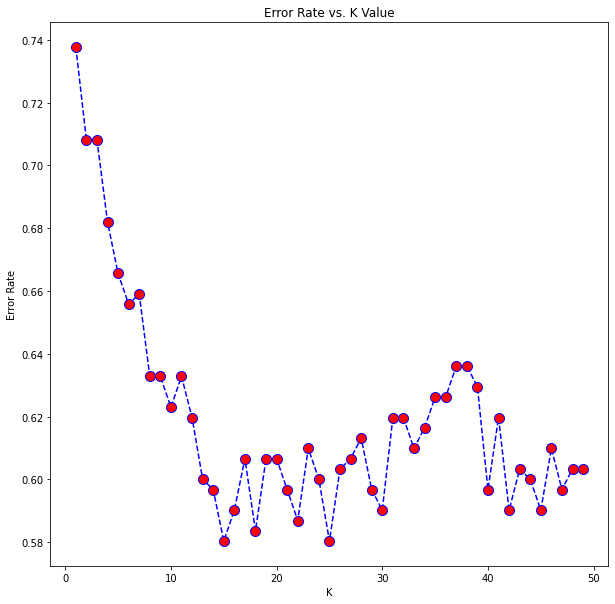

In [17]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
M5=KNeighborsClassifier(n_neighbors=6)
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P5))
print('\n')
print('classification_report')
print(classification_report(y_test,P5))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P5))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M5.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[41 22 23 15]
 [13 21  4 11]
 [27 20 24  6]
 [29 19 11 19]]


classification_report
              precision    recall  f1-score   support

           0       0.37      0.41      0.39       101
           1       0.26      0.43      0.32        49
           2       0.39      0.31      0.35        77
           3       0.37      0.24      0.29        78

    accuracy                           0.34       305
   macro avg       0.35      0.35      0.34       305
weighted avg       0.36      0.34      0.34       305



Accuracy: 34.42622950819672


Roc Value: 0.6093191006325605


## Naive_bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
M6=GaussianNB()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P6))
print('\n')
print('classification_report')
print(classification_report(y_test,P6))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P6))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M6.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[54 14 22 11]
 [12 13 11 13]
 [27 13 30  7]
 [22 23  9 24]]


classification_report
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       101
           1       0.21      0.27      0.23        49
           2       0.42      0.39      0.40        77
           3       0.44      0.31      0.36        78

    accuracy                           0.40       305
   macro avg       0.38      0.37      0.37       305
weighted avg       0.41      0.40      0.40       305



Accuracy: 39.67213114754099


Roc Value: 0.6382535642175567


## GradientBoostingClassifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
M7=GradientBoostingClassifier()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P7))
print('\n')
print('classification_report')
print(classification_report(y_test,P7))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P7))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M7.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[35 14 32 20]
 [ 8 13 12 16]
 [20 18 31  8]
 [17 15 21 25]]


classification_report
              precision    recall  f1-score   support

           0       0.44      0.35      0.39       101
           1       0.22      0.27      0.24        49
           2       0.32      0.40      0.36        77
           3       0.36      0.32      0.34        78

    accuracy                           0.34       305
   macro avg       0.33      0.33      0.33       305
weighted avg       0.35      0.34      0.34       305



Accuracy: 34.0983606557377


Roc Value: 0.6401053098109646


## HistGradientBoostingClassifier

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [26]:
M8=HistGradientBoostingClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P8))
print('\n')
print('classification_report')
print(classification_report(y_test,P8))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P8))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M8.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[36 11 30 24]
 [ 4 14 11 20]
 [16 17 32 12]
 [22 20 17 19]]


classification_report
              precision    recall  f1-score   support

           0       0.46      0.36      0.40       101
           1       0.23      0.29      0.25        49
           2       0.36      0.42      0.38        77
           3       0.25      0.24      0.25        78

    accuracy                           0.33       305
   macro avg       0.32      0.33      0.32       305
weighted avg       0.34      0.33      0.33       305



Accuracy: 33.114754098360656


Roc Value: 0.6312029876909542


## CatBoostClassifier

In [27]:
from catboost import CatBoostClassifier

In [29]:
M9=CatBoostClassifier(verbose=0)
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P9))
print('\n')
print('classification_report')
print(classification_report(y_test,P9))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P9))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M9.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[36 15 30 20]
 [11 13 11 14]
 [19 20 30  8]
 [19 20 17 22]]


classification_report
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       101
           1       0.19      0.27      0.22        49
           2       0.34      0.39      0.36        77
           3       0.34      0.28      0.31        78

    accuracy                           0.33       305
   macro avg       0.32      0.32      0.32       305
weighted avg       0.34      0.33      0.33       305



Accuracy: 33.114754098360656


Roc Value: 0.6364657837529137


## XGBClassifier

In [30]:
from xgboost import XGBClassifier

In [31]:
M10=XGBClassifier()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P10))
print('\n')
print('classification_report')
print(classification_report(y_test,P10))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P10))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M10.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[32 12 30 27]
 [ 9 13 13 14]
 [15 18 32 12]
 [12 19 24 23]]


classification_report
              precision    recall  f1-score   support

           0       0.47      0.32      0.38       101
           1       0.21      0.27      0.23        49
           2       0.32      0.42      0.36        77
           3       0.30      0.29      0.30        78

    accuracy                           0.33       305
   macro avg       0.33      0.32      0.32       305
weighted avg       0.35      0.33      0.33       305



Accuracy: 32.78688524590164


Roc Value: 0.6328450550064542


## LGBMClassifier

In [34]:
from lightgbm import LGBMClassifier

In [35]:
M11=LGBMClassifier()
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P11))
print('\n')
print('classification_report')
print(classification_report(y_test,P11))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P11))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M11.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[41 10 23 27]
 [ 3 16 10 20]
 [19 16 28 14]
 [19 20 17 22]]


classification_report
              precision    recall  f1-score   support

           0       0.50      0.41      0.45       101
           1       0.26      0.33      0.29        49
           2       0.36      0.36      0.36        77
           3       0.27      0.28      0.27        78

    accuracy                           0.35       305
   macro avg       0.35      0.34      0.34       305
weighted avg       0.37      0.35      0.36       305



Accuracy: 35.08196721311476


Roc Value: 0.6304408475805683


## Neural_network

In [36]:
from sklearn.neural_network import MLPClassifier

In [51]:
M12=MLPClassifier(hidden_layer_sizes=(400,))
M12.fit(X_train,y_train)
P12=M12.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P12))
print('\n')
print('classification_report')
print(classification_report(y_test,P12))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P12))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M12.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[43 14 31 13]
 [10 17 14  8]
 [23 14 36  4]
 [17 25 18 18]]


classification_report
              precision    recall  f1-score   support

           0       0.46      0.43      0.44       101
           1       0.24      0.35      0.29        49
           2       0.36      0.47      0.41        77
           3       0.42      0.23      0.30        78

    accuracy                           0.37       305
   macro avg       0.37      0.37      0.36       305
weighted avg       0.39      0.37      0.37       305



Accuracy: 37.37704918032787


Roc Value: 0.6630240941906272


## BaggingClassifier

In [52]:
from sklearn.ensemble import BaggingClassifier

In [55]:
M13=BaggingClassifier(base_estimator=LGBMClassifier())
M13.fit(X_train,y_train)
P13=M13.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P13))
print('\n')
print('classification_report')
print(classification_report(y_test,P13))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P13))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M13.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[39 14 23 25]
 [ 5 11 15 18]
 [17 14 33 13]
 [16 21 17 24]]


classification_report
              precision    recall  f1-score   support

           0       0.51      0.39      0.44       101
           1       0.18      0.22      0.20        49
           2       0.38      0.43      0.40        77
           3       0.30      0.31      0.30        78

    accuracy                           0.35       305
   macro avg       0.34      0.34      0.34       305
weighted avg       0.37      0.35      0.36       305



Accuracy: 35.08196721311476


Roc Value: 0.645404472998348


## CalibratedClassifierCV

In [64]:
from sklearn.calibration import CalibratedClassifierCV
M18=CalibratedClassifierCV(GaussianNB(), cv=2)
M18.fit(X_train,y_train)
P18=M18.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P18))
print('\n')
print('classification_report')
print(classification_report(y_test,P18))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P18))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M18.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[49 14 24 14]
 [11 11 13 14]
 [27 13 30  7]
 [17 24 10 27]]


classification_report
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       101
           1       0.18      0.22      0.20        49
           2       0.39      0.39      0.39        77
           3       0.44      0.35      0.39        78

    accuracy                           0.38       305
   macro avg       0.37      0.36      0.36       305
weighted avg       0.39      0.38      0.39       305



Accuracy: 38.36065573770492


Roc Value: 0.6409987737637797


## ExtraTreesClassifier

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
M23=ExtraTreesClassifier()
M23.fit(X_train,y_train)
P23=M23.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P23))
print('\n')
print('classification_report')
print(classification_report(y_test,P23))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P23))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M23.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[38 16 27 20]
 [ 8 13 14 14]
 [23 15 27 12]
 [18 23 16 21]]


classification_report
              precision    recall  f1-score   support

           0       0.44      0.38      0.40       101
           1       0.19      0.27      0.22        49
           2       0.32      0.35      0.34        77
           3       0.31      0.27      0.29        78

    accuracy                           0.32       305
   macro avg       0.32      0.32      0.31       305
weighted avg       0.34      0.32      0.33       305



Accuracy: 32.459016393442624


Roc Value: 0.6310356142757428


## BernoulliNB

In [72]:
from sklearn.naive_bayes import BernoulliNB

In [73]:
M24=BernoulliNB()
M24.fit(X_train,y_train)
P24=M24.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P24))
print('\n')
print('classification_report')
print(classification_report(y_test,P24))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P24))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M24.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[ 7 51 26 17]
 [ 1 16  8 24]
 [ 5 21 21 30]
 [ 1 33  4 40]]


classification_report
              precision    recall  f1-score   support

           0       0.50      0.07      0.12       101
           1       0.13      0.33      0.19        49
           2       0.36      0.27      0.31        77
           3       0.36      0.51      0.42        78

    accuracy                           0.28       305
   macro avg       0.34      0.30      0.26       305
weighted avg       0.37      0.28      0.26       305



Accuracy: 27.54098360655738


Roc Value: 0.6192477891041214


## LinearDiscriminantAnalysis 

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
M25=LinearDiscriminantAnalysis()
M25.fit(X_train,y_train)
P25=M25.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P25))
print('\n')
print('classification_report')
print(classification_report(y_test,P25))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P25))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M25.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[42 12 28 19]
 [ 7 14 14 14]
 [23 14 34  6]
 [17 18 15 28]]


classification_report
              precision    recall  f1-score   support

           0       0.47      0.42      0.44       101
           1       0.24      0.29      0.26        49
           2       0.37      0.44      0.40        77
           3       0.42      0.36      0.39        78

    accuracy                           0.39       305
   macro avg       0.38      0.38      0.37       305
weighted avg       0.40      0.39      0.39       305



Accuracy: 38.68852459016394


Roc Value: 0.6708354254329794


## DummyClassifier

In [78]:
from sklearn.dummy import DummyClassifier
M28=DummyClassifier()
M28.fit(X_train,y_train)
P28=M28.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P28))
print('\n')
print('classification_report')
print(classification_report(y_test,P28))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P28))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M28.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[  0   0 101   0]
 [  0   0  49   0]
 [  0   0  77   0]
 [  0   0  78   0]]


classification_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.00      0.00      0.00        49
           2       0.25      1.00      0.40        77
           3       0.00      0.00      0.00        78

    accuracy                           0.25       305
   macro avg       0.06      0.25      0.10       305
weighted avg       0.06      0.25      0.10       305



Accuracy: 25.245901639344265


Roc Value: 0.5


In [84]:
Name=['Random Forest Classifier','Decision Tree','Naive Bayes classifier','KNN', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM',
      'CAT Boosting','Neural_Network','Bagging_classifier','CalibratedClassifierCV',
      'ExtraTreesClassifier','BernoulliNB','LinearDiscriminantAnalysis','DummyClassifier']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors=5),
       GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),MLPClassifier(hidden_layer_sizes=(500,)),
        CatBoostClassifier(verbose=0),BaggingClassifier(base_estimator=LGBMClassifier()),CalibratedClassifierCV(GaussianNB(), cv=2),
        ExtraTreesClassifier(),BernoulliNB(),LinearDiscriminantAnalysis(),DummyClassifier()]

In [85]:
Roc_score=[]
Accuracy_score=[]
Balenced_accuracy=[]
Confusion_metrix=[]
Classification_Report=[]

for i in clfs:
    i.fit(X_train,y_train)
    
    Roc_value=roc_auc_score(y_test,i.predict_proba(X_test),multi_class='ovr')
    acc_value=100*accuracy_score(y_test,i.predict(X_test))
    Bal_acc_value=balanced_accuracy_score(y_test,i.predict(X_test))
    Confusion_metrix_value=confusion_matrix(y_test,i.predict(X_test))
    Classification_Report_value=classification_report(y_test,i.predict(X_test))
    
    Roc_score.append(Roc_value)
    Accuracy_score.append(acc_value)
    Balenced_accuracy.append(Bal_acc_value)
    Confusion_metrix.append(Confusion_metrix_value)
    Classification_Report.append(Classification_Report_value)

In [83]:
dict={'AROC':Roc_score ,'Accuracy':Accuracy_score,'Bal Accu':Balenced_accuracy}
score = pd.DataFrame(dict, index=Name)
score=score.sort_values(by='AROC',ascending=False)
print(score)

                                   AROC   Accuracy  Bal Accu
LinearDiscriminantAnalysis     0.670835  38.688525  0.375522
CAT Boosting                   0.667724  39.016393  0.381938
Random Forest Classifier       0.644046  34.426230  0.333377
CalibratedClassifierCV         0.640999  38.360656  0.361351
Naive Bayes classifier         0.638254  39.672131  0.374316
Neural_Network                 0.636466  33.114754  0.323351
ExtraTreesClassifier           0.636443  33.770492  0.330887
Bagging_classifier             0.636105  33.114754  0.318139
XGB Boosting                   0.632845  32.786885  0.323149
Histogram Boosting Classifier  0.631203  33.114754  0.325331
Light GBM                      0.630441  35.081967  0.344540
GBBoosting                     0.628353  34.754098  0.335290
BernoulliNB                    0.619248  27.540984  0.295346
KNN                            0.591452  33.442623  0.341253
Decision Tree                  0.542222  32.131148  0.311463
DummyClassifier         

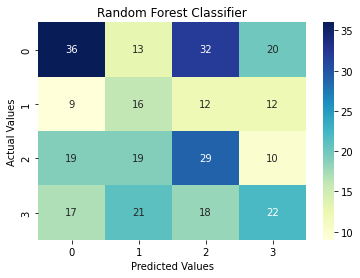

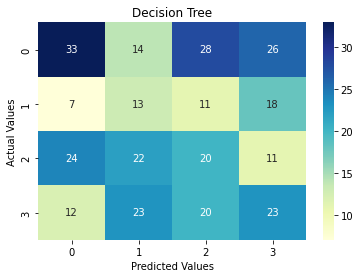

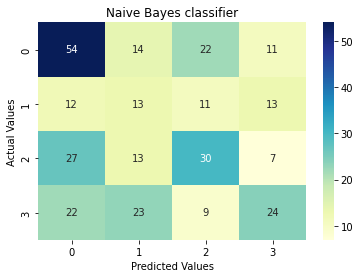

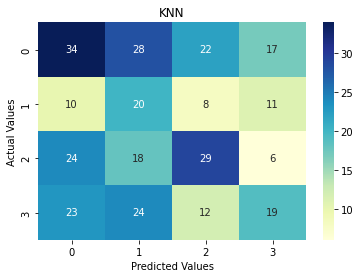

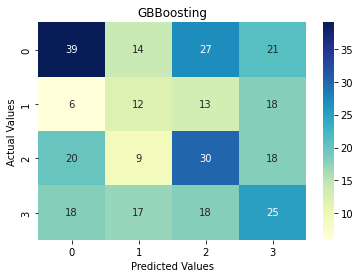

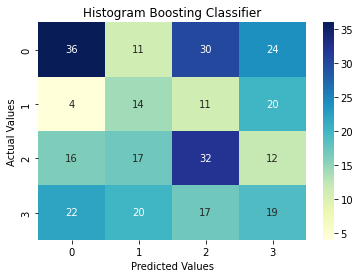

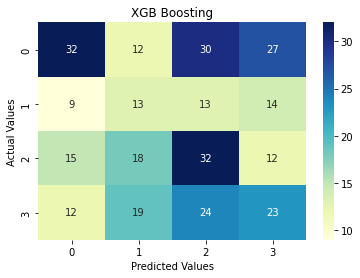

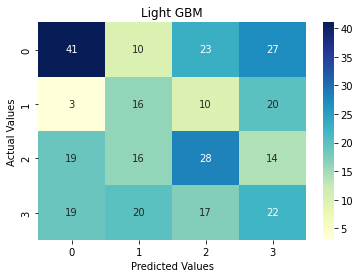

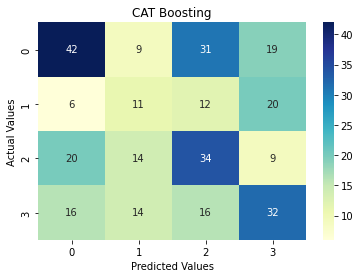

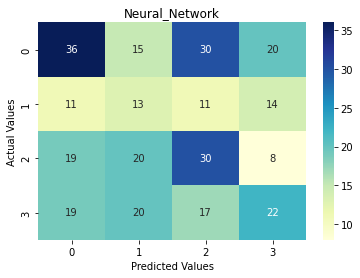

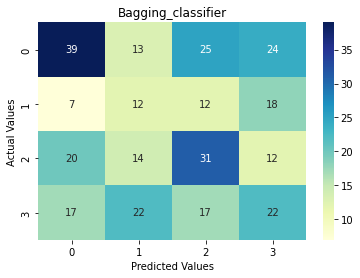

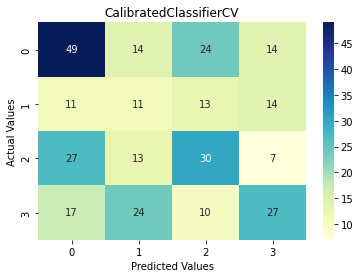

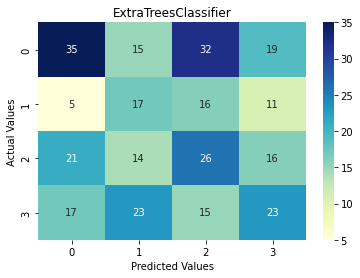

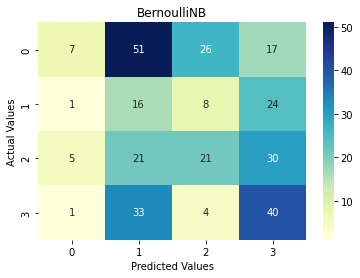

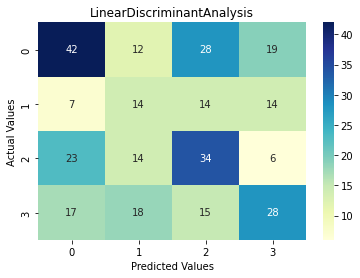

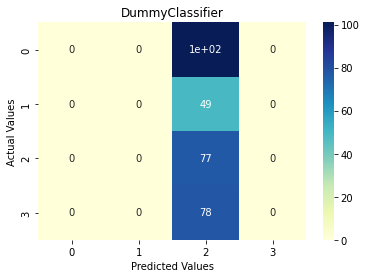

In [86]:
for i in range (len(Confusion_metrix)):
    ax = plt.axes()
    ax.set_title(Name[i])
    sns.heatmap(Confusion_metrix[i],annot=True,cmap="YlGnBu",ax=ax)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

## Cross Validation

In [88]:
from sklearn.model_selection import KFold,cross_val_score

In [89]:
kfold=KFold(n_splits=5,shuffle=False, random_state=None)
kfold=KFold(n_splits=5,shuffle=False, random_state=None)
results_mean=[]

for i in clfs:
    csv=cross_val_score(i,X_train,y_train,cv=kfold)
    mean_score=csv.mean()
    results_mean.append(mean_score)

score= pd.DataFrame(results_mean,index=Name)
score.columns=['Accuracy']

In [90]:
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
LinearDiscriminantAnalysis,0.415172
Naive Bayes classifier,0.390873
CAT Boosting,0.379688
CalibratedClassifierCV,0.366680
Neural_Network,0.342539
Histogram Boosting Classifier,0.326383
Random Forest Classifier,0.324718
Bagging_classifier,0.323092
Light GBM,0.321558
GBBoosting,0.318201


# Feature Selection

### RVCE (Recursive feature elimination with cross validation)

In [91]:
X.shape

(924, 9)

In [93]:
from sklearn.feature_selection import SelectFromModel, RFECV
model = LinearDiscriminantAnalysis()

M37 = RFECV(estimator=model, step=1, cv=kfold, scoring='accuracy', n_jobs=2)

M37 = M37.fit(X_train, y_train)

print('Optimal number of features :', M37.n_features_)

print('Best features :', X.columns[M37.support_])

Optimal number of features : 5
Best features : Index(['tenure', 'age', 'income', 'ed', 'employ'], dtype='object')


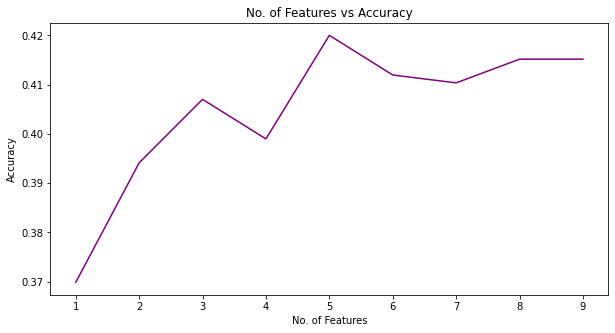

In [94]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(M37.grid_scores_)+1), np.mean(M37.grid_scores_, axis=1), color='purple')
plt.xlabel("No. of Features")
plt.ylabel("Accuracy")
plt.title("No. of Features vs Accuracy")
plt.show()

In [95]:
P37=M37.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P37))
print('\n')
print('classification_report')
print(classification_report(y_test,P37))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P37))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M37.predict_proba(X_test),multi_class='ovr'))

confusion_matrix
[[43 10 26 22]
 [ 7 15 15 12]
 [22 14 36  5]
 [16 19 16 27]]


classification_report
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       101
           1       0.26      0.31      0.28        49
           2       0.39      0.47      0.42        77
           3       0.41      0.35      0.38        78

    accuracy                           0.40       305
   macro avg       0.39      0.39      0.38       305
weighted avg       0.41      0.40      0.40       305



Accuracy: 39.67213114754099


Roc Value: 0.6710605502370713


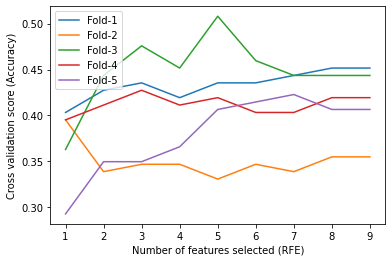

In [96]:
# # Plot number of features VS. cross-validation scores

plt.figure()
plt.xlabel("Number of features selected (RFE)")
plt.ylabel("Cross validation score (Accuracy)")
plt.plot(range(1, len(M37.grid_scores_) + 1), M37.grid_scores_)
plt.legend(['Fold-1','Fold-2','Fold-3','Fold-4','Fold-5'])
plt.show()

In [97]:
best_feature_rvce=X.columns[M37.support_]
best_feature_rvce

Index(['tenure', 'age', 'income', 'ed', 'employ'], dtype='object')

### RFE (Recursive feature elimination )

In [98]:
from sklearn.feature_selection import RFE

In [99]:
for i in range (2,len(X.columns)+1):
    M38 = RFE(estimator=LinearDiscriminantAnalysis(), n_features_to_select=i, step=1)
    M38 = M38.fit(X_train, y_train)
    P38=M38.predict(X_test)
    print(f'No of Features:{i}')
    print('Accuracy:',100*accuracy_score(y_test,P38))
    print('Roc Value:',roc_auc_score(y_test,M38.predict_proba(X_test),multi_class='ovr'))
    print('\n')

No of Features:2
Accuracy: 37.704918032786885
Roc Value: 0.6768839876662089


No of Features:3
Accuracy: 37.704918032786885
Roc Value: 0.6735792222337265


No of Features:4
Accuracy: 38.68852459016394
Roc Value: 0.6681180294656917


No of Features:5
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


No of Features:6
Accuracy: 39.34426229508197
Roc Value: 0.672889212049841


No of Features:7
Accuracy: 38.68852459016394
Roc Value: 0.6725608128330884


No of Features:8
Accuracy: 38.68852459016394
Roc Value: 0.6708354254329794


No of Features:9
Accuracy: 38.68852459016394
Roc Value: 0.6708354254329794




In [100]:
M38 = RFE(estimator=LinearDiscriminantAnalysis(), n_features_to_select=5, step=1)
M38 = M38.fit(X_train, y_train)
P38=M38.predict(X_test)
print(f'No of Features:{5}')
print('Accuracy:',100*accuracy_score(y_test,P38))
print('Roc Value:',roc_auc_score(y_test,M38.predict_proba(X_test),multi_class='ovr'))
print('\n')
print('Chosen best 5 feature by rfe:',X.columns[M38.support_])

No of Features:5
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


Chosen best 5 feature by rfe: Index(['tenure', 'age', 'income', 'ed', 'employ'], dtype='object')


### Feature by BOOSTING Technique

In [106]:
feature_imp = pd.DataFrame(M9.feature_importances_ ,index=X.columns[0:40])
feature_imp.sort_values(by=0,ascending=False)

,0
tenure,18.092122
ed,15.181395
income,15.031678
address,13.640050
age,12.907164
employ,11.043109
reside,8.710350
marital,5.394131
retire,0.000000


<AxesSubplot:>

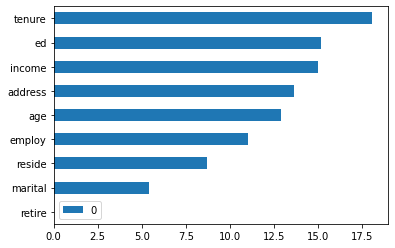

In [107]:
feature_imp.sort_values(by=0,ascending=True).plot(kind='barh')

In [110]:
feature_imp = pd.DataFrame(M9.feature_importances_ ,index=X.columns[0:40])[:5]
feature_imp.sort_values(by=0,ascending=False)

,0
tenure,18.092122
income,15.031678
address,13.640050
age,12.907164
marital,5.394131


<AxesSubplot:>

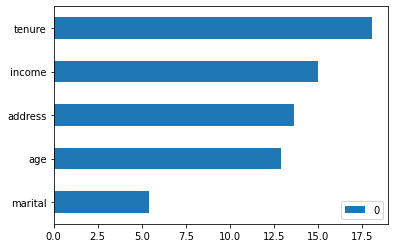

In [111]:
feature_imp.sort_values(by=0,ascending=True).plot(kind='barh')

###  Univariate feature selection 

**In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest**

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [115]:
for i in range (2,len(X.columns)+1):
    select_feature = SelectKBest(chi2, k=i).fit(X_train, y_train)
    X_train_2 = select_feature.transform(X_train)
    X_test_2 = select_feature.transform(X_test)
    M39 =LinearDiscriminantAnalysis()
    M39.fit(X_train_2,y_train)
    P39=M39.predict(X_test_2)
    print(f'No of Features:{i}')
    print('Accuracy:',100*accuracy_score(y_test,P38))
    print('Roc Value:',roc_auc_score(y_test,M38.predict_proba(X_test),multi_class='ovr'))
    print('\n')

No of Features:2
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


No of Features:3
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


No of Features:4
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


No of Features:5
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


No of Features:6
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


No of Features:7
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


No of Features:8
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713


No of Features:9
Accuracy: 39.67213114754099
Roc Value: 0.6710605502370713




In [116]:
print('Score list:', select_feature.scores_)
print('Feature list:', X.columns)

Score list: [12.10232533  1.28528431  2.48895734  0.34709038  2.91904907 22.64746927
  5.19507812         nan  0.81713636]
Feature list: Index(['tenure', 'age', 'income', 'marital', 'address', 'ed', 'employ',
       'retire', 'reside'],
      dtype='object')


### Feature Extraction with PCA

Text(0.5, 0.85, '95% cut-off threshold')

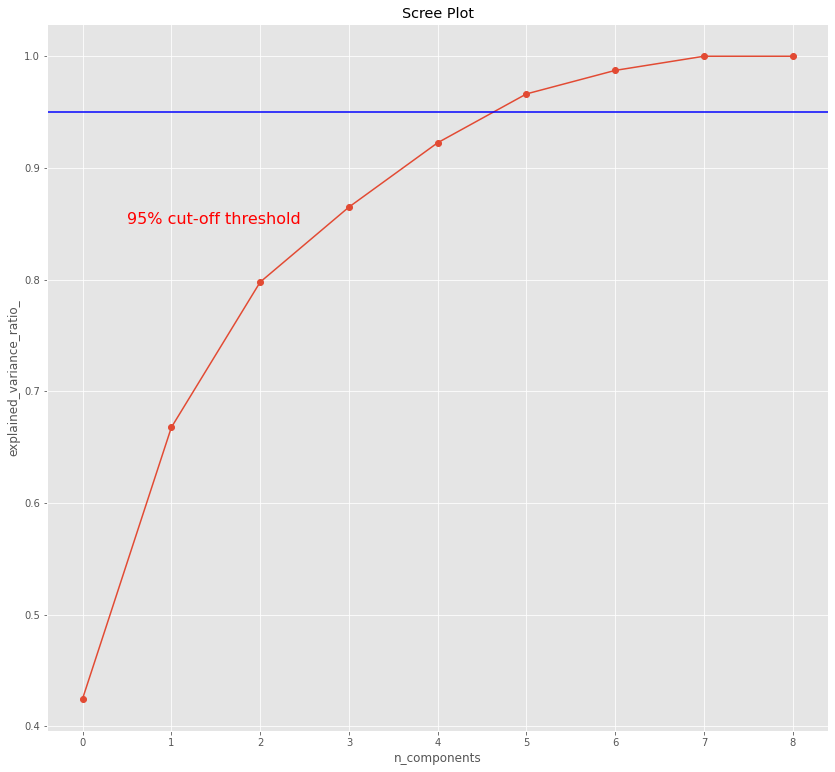

In [121]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

plt.figure(1, figsize=(14, 13))
plt.style.use("ggplot") 
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio_")
plt.title("Scree Plot")
plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

In [124]:
pca = PCA(n_components = 5)
  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [128]:
M40=LinearDiscriminantAnalysis()
M40.fit(X_train_pca,y_train)
P40=M40.predict(X_test_pca)
print('Accuracy:',100*accuracy_score(y_test,P40))

Accuracy: 40.32786885245901


## AutoML

In [150]:
# import PipelineProfiler
# from autosklearn.classification import AutoSklearnClassifier

In [179]:
# M41 = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
# # perform the search
# M41.fit(X_train, y_train)
# # summarize
# print(M41.sprint_statistics())
# # evaluate best model
# P41 = M41.predict(X_test)
# print('Accuracy:',100*accuracy_score(y_test,P41))

In [180]:
# profiler_data = PipelineProfiler.import_autosklearn(M41)
# PipelineProfiler.plot_pipeline_matrix(profiler_data)

## Hyperparameter Tuning

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [209]:
model = LinearDiscriminantAnalysis()

#### Tuning Solver

In [210]:
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = {}
grid['solver'] = ['svd', 'lsqr', 'eigen']
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid

{'solver': ['svd', 'lsqr', 'eigen']}

In [211]:
results = search.fit(X_train, y_train)

In [212]:
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.421
Config: {'solver': 'svd'}


#### Tuning shrinkage

In [213]:
model = LinearDiscriminantAnalysis(solver='svd')

In [216]:
model.fit(X_train_pca,y_train)
P=model.predict(X_test_pca)
print('Accuracy:',100*accuracy_score(y_test,P))

Accuracy: 40.32786885245901


In [218]:
import pickle
with open('model','wb') as file: #'model' --is file name     'wb'----write bytes
    pickle.dump(model,file)